### Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values  
2) Change the minimum length in apriori algorithm  
3) Visulize the obtained rules using different plots

##### Importing Libraries

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
my_movies = pd.read_csv("my_movies.csv")
my_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


##### Pre-Processing

As the data is not in transaction formation we are not using transaction encoder

In [4]:
movies = pd.get_dummies(my_movies)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


#####  Apriori Algorithm

In [5]:
frequent_itemsets = apriori(movies, min_support = 0.4, use_colnames = True)
frequent_itemsets

D:\imjma\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, V3_Sixth Sense, Sixth Sense, Gladiat..."
59,0.4,"(V3_Sixth Sense, V1_Gladiator, Sixth Sense, Gl..."
60,0.4,"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ..."
61,0.4,"(Patriot, V3_Sixth Sense, V1_Gladiator, Gladia..."


In [6]:
rule = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.7)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V3_Sixth Sense),"(Patriot, V1_Gladiator, Sixth Sense, Gladiator...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
598,(V1_Gladiator),"(Patriot, V3_Sixth Sense, Sixth Sense, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(Sixth Sense),"(Patriot, V3_Sixth Sense, V1_Gladiator, Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Gladiator),"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [7]:
rule.sort_values('lift', ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
249,"(Sixth Sense, V1_Gladiator, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
281,"(V3_Sixth Sense, V2_Patriot)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
260,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
263,"(Sixth Sense, Patriot, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
267,"(V3_Sixth Sense, V2_Patriot)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
268,"(Sixth Sense, V2_Patriot)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
269,"(V3_Sixth Sense, Patriot)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
270,"(Sixth Sense, Patriot)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
274,(V3_Sixth Sense),"(Sixth Sense, Patriot, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
277,"(Sixth Sense, V1_Gladiator, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [8]:
rule.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
249,"(Sixth Sense, V1_Gladiator, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
281,"(V3_Sixth Sense, V2_Patriot)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
260,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
263,"(Sixth Sense, Patriot, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
267,"(V3_Sixth Sense, V2_Patriot)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
268,"(Sixth Sense, V2_Patriot)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
269,"(V3_Sixth Sense, Patriot)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
270,"(Sixth Sense, Patriot)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
274,(V3_Sixth Sense),"(Sixth Sense, Patriot, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
277,"(Sixth Sense, V1_Gladiator, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf


In [9]:
rule[rule.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V3_Sixth Sense),"(Patriot, V1_Gladiator, Sixth Sense, Gladiator...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
598,(V1_Gladiator),"(Patriot, V3_Sixth Sense, Sixth Sense, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(Sixth Sense),"(Patriot, V3_Sixth Sense, V1_Gladiator, Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Gladiator),"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


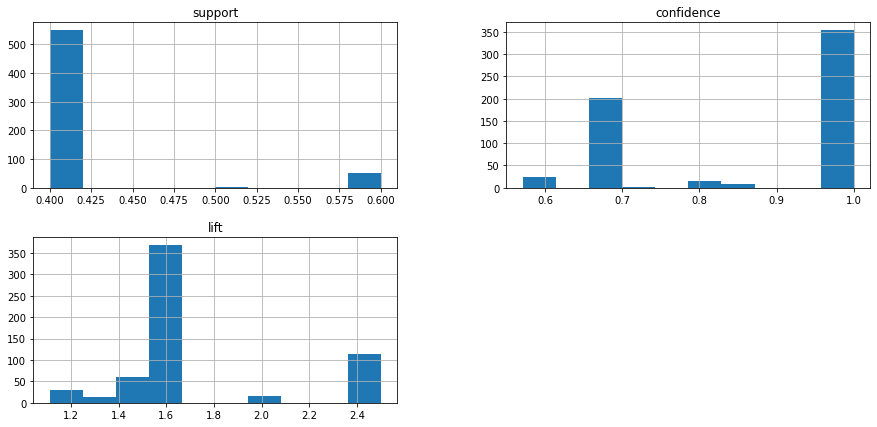

In [10]:
import matplotlib.pyplot as plt
rule[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

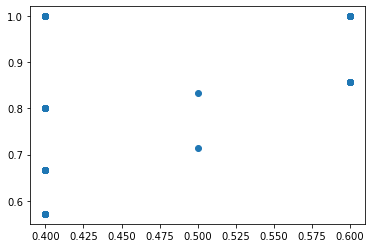

In [11]:
import matplotlib.pyplot as plt

plt.scatter(rule['support'], rule['confidence'])
plt.show()

D:\imjma\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\imjma\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
D:\imjma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


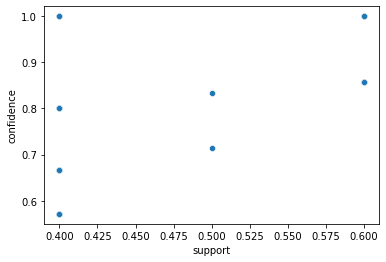

In [12]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rule,)
plt.show()